python制作球员数据六维图
https://zhuanlan.zhihu.com/p/37300710


In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib.pyplot import figure, show
from matplotlib.font_manager import FontProperties  

# 使用自带的样式进行美化  
plt.style.use("ggplot")  
# 设置字体，font2用于将字体隐藏
font = FontProperties(size=14)  
font2 = FontProperties(size=0)  
# 用来显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']  
# 类别数量  
ability_size = 6  
# 6种类别，括号内是自己设置的参照值  
ability_label = ["得分(30)", "篮板(10)", "助攻(10)", "抢断(3)", "盖帽(3)", "犯规(0)"]  
# 将球员数据存入列表，依次是得分、篮板、助攻、抢断、盖帽、犯规和位置（0为后场，1为前场）
JH=[28.1,5.1,6.7,2.1,0.7,2.7,0,'哈登','詹姆斯']
SC=[24.1,5.9,4.2,1.8,0.4,2.3,0,'库里','史蒂芬']
KD=[29.1,7.2,4.0,0.7,0.8,1.9,1,'杜兰特','凯文']
LJ=[27.5,8.6,9.1,1.4,0.9,1.7,1,'詹姆斯','勒布朗']

In [2]:
def cal(array,i):
	#这是自己设计的能力值计算公式，每项数据占据不同的比重
	if(array[6]==1):
		tot=array[0]*0.4+array[1]*0.25+array[2]*0.15+array[3]*0.05+array[4]*0.1-array[5]*0.05
	else:
		tot=array[0]*0.4+array[1]*0.15+array[2]*0.25+array[3]*0.1+array[4]*0.05-array[5]*0.05
	tot=int(tot/16*100)	
	# 球员能力值，根据各类数据所设参照值进行换算，为了在图上更直观 
	player = {  
		"M" : [array[0],array[1]*3,array[2]*3,array[3]*10,array[4]*10,(6-array[5])*5],  		
	} 			
	theta = np.linspace(0, 2 * np.pi, 6, endpoint= False)  
	# 6边形，首尾相连，形成闭合图形，需要7个点  
	theta = np.append(theta, theta[0])  
	# 运动员的这一个也增加一项  
	player["M"] = np.append(player['M'], player['M'][0])  
	# 设置每个子图的位置，投影为极坐标 
	ax1 = plt.subplot(321+i, projection = "polar")    #这里分成三行两列，四个子图分别位于第1、2、5、6个区域，便于显示  
	ax1.plot(theta, player['M'], "r")  
	ax1.fill(theta, player['M'], "r", alpha = 0.3)  
	# 把角度对应6等分  
	ax1.set_xticks(theta)  
	# 设置6个位置的显示内容，y用来设置距离极坐标图的距离  
	ax1.set_xticklabels(ability_label, fontproperties = font, y = -0.05)  
	# 设置标题
	title="评分%s"%(tot)  
	ax1.set_title(title, position = (0.5, 1.2), fontproperties = font, color = "r", size = 10)  
	# 设置弧度显示的内容  
	ax1.set_yticks(np.arange(0, 30, 10))  
	# 隐藏刻度的文本
	ax1.set_yticklabels("",fontproperties = font2) 

In [4]:
def on_pic(event):	#根据鼠标的x,y坐标，分别显示不同的文本框		
		if(140<int(event.x)<250 and 310<int(event.y)<470):
			ax1.set_visible(True)				
		elif(410<int(event.x)<520 and 310<int(event.y)<430):
			ax2.set_visible(True)	
		elif(140<int(event.x)<250 and 50<int(event.y)<170):
			ax3.set_visible(True)
		elif(410<int(event.x)<520 and 50<int(event.y)<170):
			ax4.set_visible(True)
		event.canvas.draw()
def out_pic(event):
		ax1.set_visible(False)
		ax2.set_visible(False)
		ax3.set_visible(False)
		ax4.set_visible(False)
		event.canvas.draw()

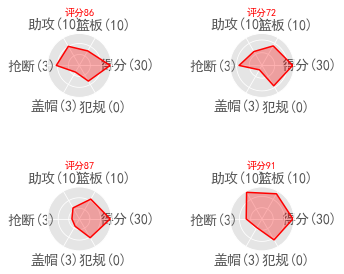

In [5]:
if __name__ == '__main__':
    fig=figure()
    cal(JH,0)
    cal(SC,1)
    cal(KD,4)
    cal(LJ,5) 
    # 绘制四个文本框，分别输出四名球员的数据，并设为不可见
    text1="%s-%s\n得分：%s\n篮板：%s\n助攻：%s\n抢断：%s\n盖帽：%s\n犯规：%s"%(JH[8],JH[7],JH[0],JH[1],JH[2],JH[3],JH[4],JH[5])
    ax1=plt.text(-10, 100, text1, fontsize=10, style='oblique',  bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)	
    ax1.set_visible(False)	
    text2="%s-%s\n得分：%s\n篮板：%s\n助攻：%s\n抢断：%s\n盖帽：%s\n犯规：%s"%(SC[8],SC[7],SC[0],SC[1],SC[2],SC[3],SC[4],SC[5])
    ax2=plt.text(-10, 100, text2, fontsize=10, style='oblique', bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)	
    ax2.set_visible(False)	
    text3="%s-%s\n得分：%s\n篮板：%s\n助攻：%s\n抢断：%s\n盖帽：%s\n犯规：%s"%(KD[8],KD[7],KD[0],KD[1],KD[2],KD[3],KD[4],KD[5])
    ax3=plt.text(-10, 100, text3, fontsize=10, style='oblique', bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)	
    ax3.set_visible(False)	
    text4="%s-%s\n得分：%s\n篮板：%s\n助攻：%s\n抢断：%s\n盖帽：%s\n犯规：%s"%(LJ[8],LJ[7],LJ[0],LJ[1],LJ[2],LJ[3],LJ[4],LJ[5])
    ax4=plt.text(-10, 100, text4, fontsize=10, style='oblique', bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)	
    ax4.set_visible(False)
    # 将鼠标操作与函数连接起来
    fig.canvas.mpl_connect('axes_enter_event', on_pic)   #鼠标进入图形
    fig.canvas.mpl_connect('axes_leave_event', out_pic)  #鼠标离开图形
    plt.show() 